<h4>Black Friday Spend Prediction</h4>

<h6>Problem Statement</h6>

<p>A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.</p>

In [85]:
# Importing data manupilation libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Loading the test and train datasets
df_train=pd.read_csv('./Datasets/train.csv')

In [4]:
df_train.shape

(550068, 12)

In [5]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [22]:
df_train.User_ID.nunique()

5891

<h5>Analyzing the dataset</h5>

###### Getting data at customer ID level

In [64]:
df_train_sub=df_train.loc[:,['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Purchase']]

In [65]:
df_train_cust1=df_train_sub.groupby(['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status']).sum()

In [68]:
df_train_cust = df_train_cust1.reset_index(level=['User_ID','Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status'])

In [69]:
df_train_cust.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Purchase
0,1000001,F,0-17,10,A,2,0,334093
1,1000002,M,55+,16,C,4+,0,810472
2,1000003,M,26-35,15,A,3,0,341635
3,1000004,M,46-50,7,B,2,1,206468
4,1000005,M,26-35,20,A,1,1,821001


In [70]:
df_train_cust.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Purchase'],
      dtype='object')

In [71]:
df_train_cust.User_ID.nunique()

5891

In [72]:
df_train_cust.shape

(5891, 8)

In [73]:
#Impact of Gender on mean spend
df_train_group_gender=df_train_cust.groupby(['Gender'])

In [75]:
df_train_group_gender['Purchase'].mean()

Gender
F    712024.394958
M    925344.402367
Name: Purchase, dtype: float64

In [76]:
df_train_group_gender['Purchase'].median()

Gender
F    407263
M    578540
Name: Purchase, dtype: int64

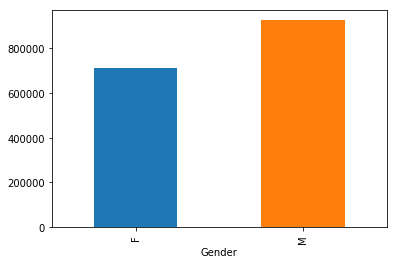

In [91]:
#ig, ax = plt.subplots(figsize=(15,7))
df_train_cust.groupby(['Gender']).mean()['Purchase'].plot.bar()
#f.plot.bar()

In [77]:
# Average Male spend is relatively higher on average than Females

In [81]:
#Impact of Marital status on mean spend
df_train_group_mar_stat=df_train_cust.groupby(['Marital_Status'])

In [82]:
df_train_group_mar_stat['Purchase'].mean()

Marital_Status
0    880575.781972
1    843526.796686
Name: Purchase, dtype: float64

In [83]:
df_train_group_mar_stat['Purchase'].median()

Marital_Status
0    539673.0
1    503338.5
Name: Purchase, dtype: float64

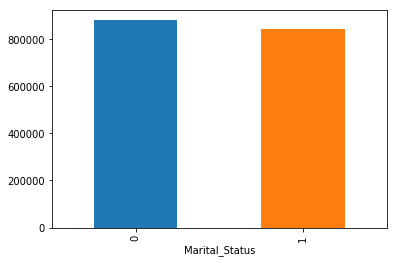

In [92]:
df_train_cust.groupby(['Marital_Status']).mean()['Purchase'].plot.bar()

In [21]:
# Unmarried people spend little higher than married

In [ ]:
#Impact of Gender + Marital status on mean spend
df_train_group_mar_stat=df_train_cust.groupby(['Marital_Status'])

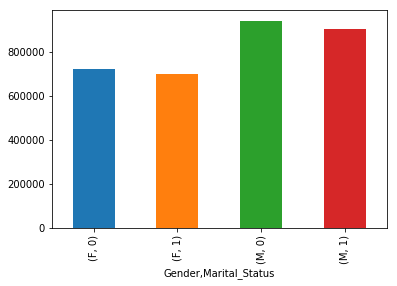

In [93]:
df_train_cust.groupby(['Gender','Marital_Status']).mean()['Purchase'].plot.bar()

In [94]:
#Unmarried Male and Females spend slightly more than their male counterparts